# data handling


In [31]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier



In [6]:
#Read the Dataset
df = pd.read_csv('../datasets/PCOS_data.csv')
df.head()

# Display basic information and the first few rows
print(df.info())
display(df.head())

# Generate descriptive statistics
display(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

2. Data Cleaning and Preparation


In [7]:
# 5. Normalize column names
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.columns.tolist())

['Sl._No', 'Patient_File_No.', 'PCOS_(Y/N)', 'Age_(yrs)', 'Weight_(Kg)', 'Height(Cm)', 'BMI', 'Blood_Group', 'Pulse_rate(bpm)', 'RR_(breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle_length(days)', 'Marraige_Status_(Yrs)', 'Pregnant(Y/N)', 'No._of_abortions', 'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip_Ratio', 'TSH_(mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit_D3_(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight_gain(Y/N)', 'hair_growth(Y/N)', 'Skin_darkening_(Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)', 'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 'BP__Systolic_(mmHg)', 'BP__Diastolic_(mmHg)', 'Follicle_No._(L)', 'Follicle_No._(R)', 'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 'Endometrium_(mm)']


In [10]:
# Correctly handle numeric columns with special characters and potential non-numeric data
numeric_columns = ['BMI', 'Age_(yrs)', 'Weight_(Kg)', 'Waist:Hip_Ratio', 
                   'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 
                   'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)', 
                   'Cycle_length(days)', 'Endometrium_(mm)', 
                   'BP__Systolic_(mmHg)', 'BP__Diastolic_(mmHg)']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace(r'^\.+$', '', regex=True), errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Handle categorical columns and fill missing values with mode
categorical_columns = ['PCOS_(Y/N)', 'Pregnant(Y/N)', 'Weight_gain(Y/N)', 
                       'hair_growth(Y/N)', 'Skin_darkening_(Y/N)', 
                       'Hair_loss(Y/N)', 'Pimples(Y/N)', 
                       'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 
                       'Blood_Group']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
# Encode categorical variables using LabelEncoder
labelencoder = LabelEncoder()
for column in categorical_columns:
    df[column] = labelencoder.fit_transform(df[column])

# Normalize or standardize numerical columns
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# first try

Statistical Analysis and Visualization


            count      mean       std       min       25%       50%       75%  \
PCOS_(Y/N)                                                                      
0           364.0  0.124459  0.848121 -3.314582  0.039681  0.039681  0.710533   
1           177.0 -0.255949  1.221626 -1.972877 -1.302024  0.039681  0.039681   

                 max  
PCOS_(Y/N)            
0           4.735648  
1           4.735648  


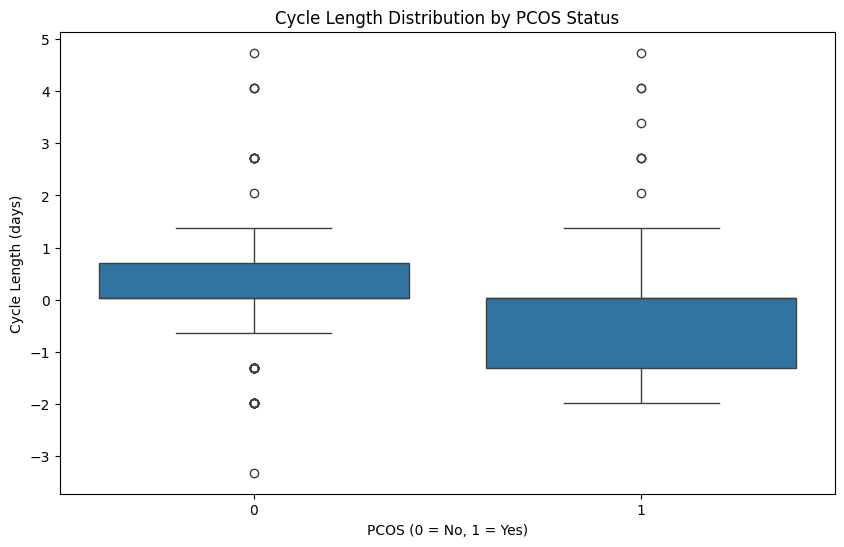

In [14]:
# Statistical summary of 'Cycle_length(days)' grouped by 'PCOS_(Y/N)'
grouped_cycle = df.groupby('PCOS_(Y/N)')['Cycle_length(days)'].describe()
print(grouped_cycle)

# Boxplot to visualize the distribution of 'Cycle_length(days)' for each PCOS category
plt.figure(figsize=(10, 6))
sns.boxplot(x='PCOS_(Y/N)', y='Cycle_length(days)', data=df)
plt.title('Cycle Length Distribution by PCOS Status')
plt.xlabel('PCOS (0 = No, 1 = Yes)')
plt.ylabel('Cycle Length (days)')
plt.show()


Predictive Modeling


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Feature and Target
X = df[['Cycle_length(days)']]  # Only using cycle length as a feature
y = df['PCOS_(Y/N)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy of model using only Cycle_length(days): {accuracy:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')


Accuracy of model using only Cycle_length(days): 0.7064
ROC-AUC Score: 0.5365


In [16]:
from sklearn.ensemble import RandomForestClassifier


In [17]:
# Features and Target
X = df.drop(['PCOS_(Y/N)'], axis=1)
y = df['PCOS_(Y/N)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Random Forest Model Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest ROC-AUC Score: {roc_auc_rf:.4f}')

Random Forest Model Accuracy: 0.8624
Random Forest ROC-AUC Score: 0.8113


Implementing Hyperparameter Tuning with Optuna for Random Forest


In [19]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 15)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 15)
    
    clf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    score = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

[I 2024-10-11 18:22:41,544] A new study created in memory with name: no-name-b4bdf7c1-f41c-4950-922d-fae393b8a15c
[I 2024-10-11 18:22:41,988] Trial 0 finished with value: 0.8935185185185185 and parameters: {'n_estimators': 258, 'max_depth': 38, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.8935185185185185.
[I 2024-10-11 18:22:42,330] Trial 1 finished with value: 0.9074074074074074 and parameters: {'n_estimators': 171, 'max_depth': 38, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.9074074074074074.
[I 2024-10-11 18:22:42,846] Trial 2 finished with value: 0.9050925925925926 and parameters: {'n_estimators': 276, 'max_depth': 35, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9074074074074074.
[I 2024-10-11 18:22:43,301] Trial 3 finished with value: 0.9027777777777777 and parameters: {'n_estimators': 251, 'max_depth': 49, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 1 with val

Best trial: {'n_estimators': 285, 'max_depth': 38, 'min_samples_split': 6, 'min_samples_leaf': 1}


In [22]:
# Train the model with the best parameters found
rf_best = RandomForestClassifier(**study.best_trial.params)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [23]:
print(f'Improved Random Forest Model Accuracy: {accuracy_best:.4f}')


Improved Random Forest Model Accuracy: 0.8807


In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(**study.best_trial.params)),
    ('svc', SVC(probability=True, kernel='linear')),
    ('dt', DecisionTreeClassifier())
]

# Create the stacking classifier
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(), cv=5
)

# Train the stacking classifier
clf.fit(X_train, y_train)
y_pred_stack = clf.predict(X_test)

# Evaluate the model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacked Model Accuracy: {accuracy_stack:.4f}')


Stacked Model Accuracy: 0.8716


# second try

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [15]:
# Prepare data
X = df.drop('PCOS_(Y/N)', axis=1)
y = df['PCOS_(Y/N)']


In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Initialize classifiers
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)

In [19]:
# Sanitize column names for LightGBM compatibility
X_train.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

# Re-initialize and train the LightGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Predict and calculate accuracy
lgbm_pred = lgbm.predict(X_test)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
print(f"LightGBM Model Accuracy: {lgbm_acc:.4f}")


[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [20]:
# Train models
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)
catboost.fit(X_train, y_train)

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [21]:
# Make predictions
xgb_pred = xgb.predict(X_test)
lgbm_pred = lgbm.predict(X_test)
catboost_pred = catboost.predict(X_test)

# Calculate and print accuracy
xgb_acc = accuracy_score(y_test, xgb_pred)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
catboost_acc = accuracy_score(y_test, catboost_pred)

print(f"XGBoost Model Accuracy: {xgb_acc:.4f}")
print(f"LightGBM Model Accuracy: {lgbm_acc:.4f}")
print(f"CatBoost Model Accuracy: {catboost_acc:.4f}")

XGBoost Model Accuracy: 0.8899
LightGBM Model Accuracy: 0.8624
CatBoost Model Accuracy: 0.8716


In [22]:
import optuna
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# Prepare data
X = df.drop('PCOS_(Y/N)', axis=1)
y = df['PCOS_(Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Define the objective function for XGBoost
def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
    }
    clf = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    return accuracy_score(y_test, preds)

# Define the objective function for CatBoost
def catboost_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
    }
    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)
    clf = CatBoostClassifier(**params, random_state=42, verbose=0)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    return accuracy_score(y_test, preds)

In [25]:
# Run Optuna optimization
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(xgb_objective, n_trials=50)
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(catboost_objective, n_trials=50)

print('Best XGBoost parameters:', study_xgb.best_trial.params)
print('Best CatBoost parameters:', study_catboost.best_trial.params)

[I 2024-10-11 18:34:28,814] A new study created in memory with name: no-name-c253e2c0-8420-42e7-8186-d77f61939d8d
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-10-11 18:34:29,126] Trial 0 finished with value: 0.8715596330275229 and parameters: {'n_estimators': 844, 'max_depth': 15, 'learning_rate': 0.039286952822719004, 'subsample': 0.5241822923013841, 'colsample_bytree': 0.9266785753913485, 'min_child_weight': 1, 'reg_alpha': 0.14916792727185513, 'reg_lambda': 0.4814644178339613}. Best is trial 0 with value: 0.8715596330275229.
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:34:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-gro

Best XGBoost parameters: {'n_estimators': 490, 'max_depth': 18, 'learning_rate': 0.27603251449312677, 'subsample': 0.9112431320559429, 'colsample_bytree': 0.9377387861396335, 'min_child_weight': 9, 'reg_alpha': 0.13264400034289026, 'reg_lambda': 0.48568159603682715}
Best CatBoost parameters: {'iterations': 435, 'depth': 9, 'learning_rate': 0.2997059153452517, 'l2_leaf_reg': 6.679827669242712, 'border_count': 144, 'bootstrap_type': 'MVS'}


2. Setup a Voting Classifier


In [27]:
# Function to sanitize column names
def sanitize_column_names(dataframe):
    sanitized_columns = {col: "".join(c if c.isalnum() else "_" for c in str(col)) for col in dataframe.columns}
    return dataframe.rename(columns=sanitized_columns)

# Sanitize column names in both training and testing data
X_train_sanitized = sanitize_column_names(X_train)
X_test_sanitized = sanitize_column_names(X_test)

# Reinitialize the classifiers with sanitized data
xgb_best = XGBClassifier(**study_xgb.best_trial.params, random_state=42, use_label_encoder=False, eval_metric='logloss')
lgbm_best = LGBMClassifier(random_state=42)
catboost_best = CatBoostClassifier(**study_catboost.best_trial.params, random_state=42, verbose=0)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('lgbm', lgbm_best),
        ('catboost', catboost_best)
    ],
    voting='soft'
)

# Train the voting classifier using sanitized data
voting_clf.fit(X_train_sanitized, y_train)

# Evaluate the classifier
voting_pred = voting_clf.predict(X_test_sanitized)
voting_accuracy = accuracy_score(y_test, voting_pred)
print(f'Voting Classifier Accuracy: {voting_accuracy:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:36:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2029
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

1. Feature Engineering


In [29]:
# Fill missing values
# For numeric columns, use median; for categorical, use mode
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].fillna(X[column].mode()[0])
    else:
        X[column] = X[column].fillna(X[column].median())

# Verify if any NaNs remain
print(X.isnull().sum())

# Proceed with creating polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

# Split the enhanced dataset
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)

# Sanitize column names for LightGBM compatibility
def sanitize_column_names(dataframe):
    sanitized_columns = {col: "".join(c if c.isalnum() else "_" for c in str(col)) for col in dataframe.columns}
    return dataframe.rename(columns=sanitized_columns)

X_train_poly_sanitized = sanitize_column_names(X_train_poly)
X_test_poly_sanitized = sanitize_column_names(X_test_poly)


Sl._No                    0
Patient_File_No.          0
Age_(yrs)                 0
Weight_(Kg)               0
Height(Cm)                0
BMI                       0
Blood_Group               0
Pulse_rate(bpm)           0
RR_(breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle_length(days)        0
Marraige_Status_(Yrs)     0
Pregnant(Y/N)             0
No._of_abortions          0
I___beta-HCG(mIU/mL)      0
II____beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip_Ratio           0
TSH_(mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit_D3_(ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight_gain(Y/N)          0
hair_growth(Y/N)          0
Skin_darkening_(Y/N)      0
Hair_loss(Y/N)            0
Pimples(Y/N)              0
Fast_food_(Y/N)           0
Reg.Exercise(Y/N)   

Reinitializing Models and Training


In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define base estimators
estimators = [
    ('xgb', XGBClassifier(**study_xgb.best_trial.params, random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(random_state=42)),
    ('catboost', CatBoostClassifier(**study_catboost.best_trial.params, random_state=42, verbose=0))
]

# Initialize the Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Now fit the stacking classifier
stacking_clf.fit(X_train_poly_sanitized, y_train)

# Evaluate the classifier
stacking_pred = stacking_clf.predict(X_test_poly_sanitized)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy: {stacking_accuracy:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 75152
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60899
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336232 -> initscore=-0.680132
[LightGBM] [Info] Start training from score -0.680132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

Improved Cross-Validation Setup


In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Using StratifiedKFold for cross-validation in the stacking model
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for train_index, test_index in skf.split(X_poly_df, y):
    X_train_fold, X_test_fold = X_poly_df.iloc[train_index], X_poly_df.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Sanitize column names for LightGBM compatibility
    X_train_fold_sanitized = sanitize_column_names(X_train_fold)
    X_test_fold_sanitized = sanitize_column_names(X_test_fold)

    stacking_clf.fit(X_train_fold_sanitized, y_train_fold)
    y_pred_fold = stacking_clf.predict(X_test_fold_sanitized)
    score = accuracy_score(y_test_fold, y_pred_fold)
    scores.append(score)

average_score = np.mean(scores)
print(f'Average Stacking Classifier Accuracy (10-fold CV): {average_score:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:44:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83643
[LightGBM] [Info] Number of data points in the train set: 486, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327160 -> initscore=-0.721056
[LightGBM] [Info] Start training from score -0.721056
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67245
[LightGBM] [Info] Number of data points in the train set: 388, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327320 -> initscore=-0.720333
[LightGBM] [Info] Start training from score -0.720333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83532
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328542 -> initscore=-0.714786
[LightGBM] [Info] Start training from score -0.714786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 128, number of negative: 261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67228
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329049 -> initscore=-0.712490
[LightGBM] [Info] Start training from score -0.712490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83755
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328542 -> initscore=-0.714786
[LightGBM] [Info] Start training from score -0.714786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:51:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 128, number of negative: 261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67393
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329049 -> initscore=-0.712490
[LightGBM] [Info] Start training from score -0.712490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:54:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 160, number of negative: 327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83704
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328542 -> initscore=-0.714786
[LightGBM] [Info] Start training from score -0.714786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:54:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:54:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:54:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 128, number of negative: 261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67291
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329049 -> initscore=-0.712490
[LightGBM] [Info] Start training from score -0.712490
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:57:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83673
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326489 -> initscore=-0.724109
[LightGBM] [Info] Start training from score -0.724109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:57:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:57:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67288
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326478 -> initscore=-0.724157
[LightGBM] [Info] Start training from score -0.724157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:00:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84028
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326489 -> initscore=-0.724109
[LightGBM] [Info] Start training from score -0.724109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:01:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:01:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:01:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67519
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326478 -> initscore=-0.724157
[LightGBM] [Info] Start training from score -0.724157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:03:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83662
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326489 -> initscore=-0.724109
[LightGBM] [Info] Start training from score -0.724109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:04:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:04:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:04:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005739 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67229
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326478 -> initscore=-0.724157
[LightGBM] [Info] Start training from score -0.724157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83758
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326489 -> initscore=-0.724109
[LightGBM] [Info] Start training from score -0.724109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67277
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326478 -> initscore=-0.724157
[LightGBM] [Info] Start training from score -0.724157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83662
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326489 -> initscore=-0.724109
[LightGBM] [Info] Start training from score -0.724109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67312
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326478 -> initscore=-0.724157
[LightGBM] [Info] Start training from score -0.724157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:13:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 159, number of negative: 328
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 83939
[LightGBM] [Info] Number of data points in the train set: 487, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326489 -> initscore=-0.724109
[LightGBM] [Info] Start training from score -0.724109
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 127, number of negative: 262
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67681
[LightGBM] [Info] Number of data points in the train set: 389, number of used features: 989
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326478 -> initscore=-0.724157
[LightGBM] [Info] Start training from score -0.724157
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

KeyboardInterrupt: 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid for the logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Set up grid search for the meta-model (logistic regression)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train_poly_sanitized, y_train)

# Best estimator
best_meta_model = grid_search.best_estimator_
print(f"Best Logistic Regression Meta-Model: {best_meta_model}")

# Set the best meta-model in the stacking classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=best_meta_model,
    cv=5
)

# Train the stacking classifier with the optimized meta-model
stacking_clf.fit(X_train_poly_sanitized, y_train)
stacking_pred = stacking_clf.predict(X_test_poly_sanitized)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy with Optimized Meta-Model: {stacking_accuracy:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Best Logistic Regression Meta-Model: LogisticRegression(C=1)
[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 75152
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:17:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60899
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336232 -> initscore=-0.680132
[LightGBM] [Info] Start training from score -0.680132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Set up the stacking classifier with a different meta-model (RandomForest)
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    cv=5
)

# Train the stacking classifier with RandomForest as the meta-model
stacking_clf.fit(X_train_poly_sanitized, y_train)
stacking_pred = stacking_clf.predict(X_test_poly_sanitized)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy with RandomForest Meta-Model: {stacking_accuracy:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:23:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 75152
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:24:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:24:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:24:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\User

[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60899
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 988
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336232 -> initscore=-0.680132
[LightGBM] [Info] Start training from score -0.680132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [37]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination with Logistic Regression
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe.fit(X_train_poly_sanitized, y_train)

# Reduce features in train and test sets
X_train_rfe = rfe.transform(X_train_poly_sanitized)
X_test_rfe = rfe.transform(X_test_poly_sanitized)

# Refit the stacking classifier with reduced features
stacking_clf.fit(X_train_rfe, y_train)
stacking_pred = stacking_clf.predict(X_test_rfe)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print(f'Stacking Classifier Accuracy after Feature Selection: {stacking_accuracy:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

[LightGBM] [Info] Number of positive: 145, number of negative: 287
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335648 -> initscore=-0.682748
[LightGBM] [Info] Start training from score -0.682748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:27:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 116, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1134
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.336232 -> initscore=-0.680132
[LightGBM] [Info] Start training from score -0.680132
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes